In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache
from pathlib import Path
from tqdm import tqdm
import json
import re
%matplotlib inline

In [2]:
data = pd.read_csv('../resources/dataset/data_all_annotators.csv')
data = data[~data['target'].str.contains(r'[0-9]+')]

In [3]:
data.sample(20, random_state=5) # Show some samples

,annotator_file,paragraph,sentence,target,label
51585,oi-97,Ce jeune patient a présenté à l'examen un reta...,"Il existait une baisse de l'acuité visuelle , ...",une baisse,par-défaut
13267,dm-1,Les pharmaciennes de l'hôpital ont assuré un s...,"Deux semaines plus tard , la patiente avait ef...",Deux semaines,par-défaut
20567,ep-65,"Pour une prévention primaire , nous avons déci...","Cependant , 2 ans et demi de l'implantation , ...",de choc,par-défaut
3702,ak-32,Cet enfant est issu d'un milieu socio -familia...,En l'absence d étiologie évidente et devant le...,pour analyse toxicologique,par-défaut
15802,ep-23,A J12 en post-opératoire le patient avait prés...,"Une radiographie thoracique réalisée , révélai...",révélait,par-défaut
5259,ak-41,"C.A., 12 ans a été vue en consultation pour do...",Un amincissement du parenchyme postéro-interne...,du rein,par-défaut
2003,ak-2,La première désensibilisation a eu lieu lors d...,"Lors de cette désensibilisation , la prémédica...",Lors de cette désensibilisation,par-défaut
10056,ak-66,Le reste de l'examen est sans particularités,Le reste de l'examen est sans particularités,de l'examen,par-défaut
8933,ak-57,"À la mi-décembre 2009 , une aggravation de la ...",Il recevra des médicaments pour soulager ses s...,pour soulager,par-défaut
37765,ngr-86,"Mr B . L , 51 ans , sans antécédents pathologi...","L , 51 ans , sans antécédents pathologiques pa...",de pollakiurie,par-défaut


In [4]:
len(data)
data.shape

(46694, 5)

In [5]:
labels = list(set(data['label']))
labels

['pas-sur-de-comprendre', 'ne-connais-pas', 'par-défaut']

pas-sur-de-comprendre 1012
ne-connais-pas 5128
par-défaut 40554


<AxesSubplot:ylabel='label'>

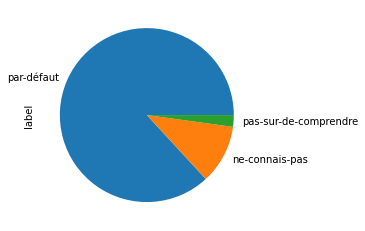

In [6]:
for label in labels:
    print(label, len(data[data['label'] == label]))

pd.value_counts(data['label']).plot.pie()

In [7]:
#words by each label
print(labels[0])
print(set(data[data['label'] == labels[0]]['target']))

pas-sur-de-comprendre
{'une fistule recto-urétrale', 'à base de cidofovir intraveineux', 'de la ligne blanche', 'en protide', 'du volume moyen', 'médiorénale', 'à une cholécystectomie', 'le pronostic vital', 'de gastro-entérologie', 'un reflux vésico-rénal droit', 'de nifédipine', 'toute la paroi vésicale', 'et le psoriasis', 'par une sonde vésicale', 'de collagénisation caractérisées', 'à la desmine', 'de risque cardiovasculaire notable', 'réactionnelles non métastatiques', 'sans aucun drainage et', 'de la sonde de Pezzer', 'et une augmentation des LDH', 'une résection endoscopique', 'Le rein controlatéral', 'et gentamicine', 'aux anti-arythmiques', 'en région sus pubienne', 'et des palpitations fréquentes', 'le cisplatin', "d'un virus du papillome humain", 'de la cotinine (non dosée', 'à une hémicystectomie trigonale', 'et un scrotum tuméfiés , étranglés', 'dans une trame fibrohyaline', 'refluant', 'de la diphenhydramine dosée', "d'isotrétinoïne", 'une gastrite congestive', 'Pour les

In [8]:
print(labels[1])
print(set(data[data['label'] == labels[1]]['target']))

ne-connais-pas
{'de résection', 'de la ligne blanche', 'de la fluindione intervenant', 'sous triple antibiothérapie parentérale', 'guide', 'au dôme vésical', 'surtout', 'une volumineuse hématocèle droite', 'de P -gp ,', 'de sels et pigments biliaires', 'de la fluindione', 'sur les cellules tumorales', 'Inhibiteur', 'pour une douleur pénoscrotale', "d'acné vulgaire et", 'de nifédipine', "en faveur d'une collection abcédée", 'de collagénisation caractérisées', 'de tumeur oncocytaire', 'un maximum', 'Le potassium', 'à la desmine', 'et une augmentation des LDH', 'une résection endoscopique', 'aux anti-arythmiques', 'oméprazole', 'par laparotomie', 'implantable simple chambre', 'Les passages urétéraux', "d'un virus du papillome humain", 'une métastase ganglionnaire médiastinale confirmée', 'splénomégalie', 'gabapentine ,', 'dans une trame fibrohyaline', 'refluant', 'à une splénectomie et', 'une hémorragie intra-tumorale', "d'hémoglobine et une", 'une masse latéro-rectale gauche', 'le méprob

In [9]:
print(labels[2])
print(set(data[data['label'] == labels[2]]['target']))

par-défaut
{"L'état clinique", 'de résection', 'de la patiente demeure acceptable', 'un enfant né', 'découvre', 'puis tous les ans', 'une surcharge pulmonaire', 'au dôme vésical', 'vivante', 'pour une douleur pénoscrotale', 'Le potassium', 'avec fracture complexe', 'un maximum', 'ses symptômes', 'une réaction', 'de continuer', 'et une augmentation des LDH', 'une résection endoscopique', 'évolue', 'aux anti-arythmiques', 'Vu l absence', 'Les passages urétéraux', 'au laboratoire', 'refluant', 'dans une trame fibrohyaline', 'une très grosse masse tissulaire', 'Le suivi', 'une masse latéro-rectale gauche', 'après cathétérisme', 'Le bilan', "et d'acéprométazine", 'la scintigraphie rénale', 'avec une importante composante hémorragique', 'chez la patiente', 'une netteamélioration', 'pour les différentes doses', "n'est pas visualisée", "jusqu'au dilatateur", 'de la difficulté', 'à ces organes', 'pour cancer prostatique', 'franchissait', 'sa chromurie', 'ne révélait', 'à un mois puis', 'de la c